In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn
import sklearn as sklearn

In [3]:
df = pd.read_csv('spotify_db.csv')
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113417,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113418,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113419,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113420,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# Advanced Analysis
## Clustering:

Perform clustering (e.g., K-means) to identify distinct groups of songs based on audio features.

In [32]:
from sklearn.cluster import KMeans

features  = df[['danceability', 'energy', 'loudness', 'valence', 'tempo']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(features)
df['cluster'] = kmeans.labels_

## Principal Component Analysis (PCA):

Use PCA to reduce the dimensionality of your data and visualize it in 2D or 3D space.

In [33]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])

# Add the cluster labels
pca_df['cluster'] = df['cluster']

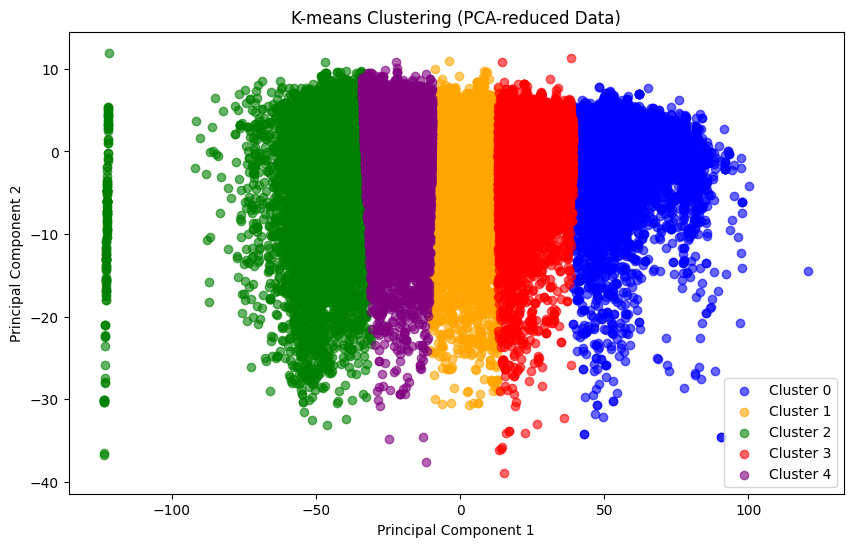

In [36]:
# Define colors for each cluster
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(5):
    cluster_data = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], color=colors[cluster], label=f'Cluster {cluster}', alpha=0.6)

plt.title('K-means Clustering (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

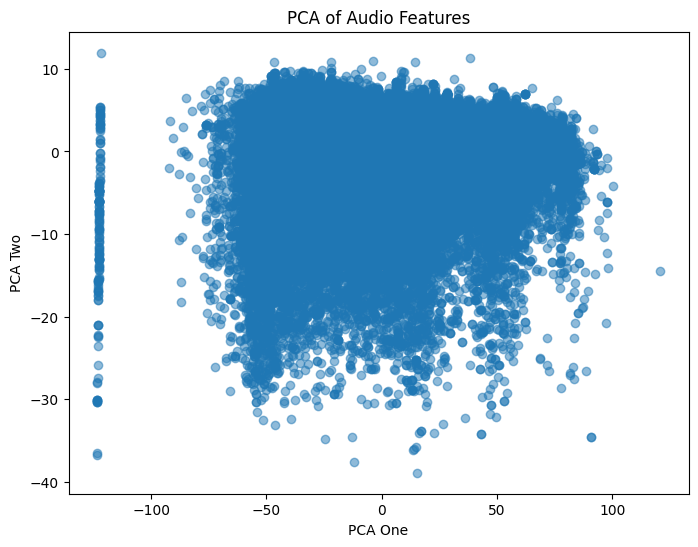

In [57]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(df['pca-one'], df['pca-two'], alpha=0.5)
plt.title('PCA of Audio Features')
plt.xlabel('PCA One')
plt.ylabel('PCA Two')
plt.show()

In [7]:
df['cluster'].value_counts()

cluster
1    34937
4    28757
3    21240
2    15187
0    13301
Name: count, dtype: int64

In [22]:
df[['danceability', 'energy', 'loudness', 'valence', 'tempo','cluster']].head()

,danceability,energy,loudness,valence,tempo,cluster
0,0.676,0.4610,-6.746,0.715,87.917,2
1,0.420,0.1660,-17.235,0.267,77.489,2
2,0.438,0.3590,-9.734,0.120,76.332,2
3,0.266,0.0596,-18.515,0.143,181.740,0
4,0.618,0.4430,-9.681,0.167,119.949,1


In [49]:
df[['danceability', 'energy', 'loudness', 'valence', 'tempo','cluster']].loc[(df['cluster']==0)]

,danceability,energy,loudness,valence,tempo,cluster
3,0.266,0.0596,-18.515,0.1430,181.740,0
32,0.593,0.4550,-8.192,0.5640,202.019,0
33,0.296,0.2060,-11.799,0.2020,165.400,0
34,0.296,0.2060,-11.799,0.2020,165.400,0
35,0.296,0.2060,-11.799,0.2020,165.400,0
...,...,...,...,...,...,...
113255,0.362,0.7280,-8.105,0.0557,163.941,0
113284,0.144,0.6440,-6.666,0.1380,185.570,0
113289,0.365,0.4870,-6.523,0.4740,207.881,0
113320,0.266,0.3180,-8.948,0.2190,190.389,0


In [50]:
df[['danceability', 'energy', 'loudness', 'valence', 'tempo','cluster']].loc[(df['cluster']==1)]

,danceability,energy,loudness,valence,tempo,cluster
4,0.618,0.443,-9.681,0.1670,119.949,1
8,0.625,0.414,-8.700,0.6690,130.088,1
11,0.483,0.303,-10.058,0.1390,133.406,1
12,0.489,0.314,-9.245,0.6070,124.234,1
14,0.755,0.780,-6.084,0.3870,120.004,1
...,...,...,...,...,...,...
113411,0.495,0.281,-12.070,0.2060,127.731,1
113414,0.475,0.860,-4.722,0.4270,113.949,1
113416,0.331,0.171,-15.668,0.3270,132.147,1
113417,0.172,0.235,-16.393,0.0339,125.995,1


In [52]:
df[['danceability', 'energy', 'loudness', 'valence', 'tempo','cluster']].loc[(df['cluster']==2)]

,danceability,energy,loudness,valence,tempo,cluster
0,0.676,0.461,-6.746,0.7150,87.917,2
1,0.420,0.166,-17.235,0.2670,77.489,2
2,0.438,0.359,-9.734,0.1200,76.332,2
9,0.442,0.632,-6.770,0.1960,78.899,2
13,0.691,0.234,-6.441,0.2090,87.103,2
...,...,...,...,...,...,...
113402,0.516,0.634,-4.850,0.0921,76.994,2
113405,0.363,0.462,-8.232,0.0687,80.003,2
113408,0.198,0.257,-17.361,0.0381,89.494,2
113418,0.174,0.117,-18.318,0.0350,85.239,2


In [55]:
df[['danceability', 'energy', 'loudness', 'valence', 'tempo','cluster']].loc[(df['cluster']==3)]

,danceability,energy,loudness,valence,tempo,cluster
6,0.407,0.147,-8.822,0.0765,141.284,3
7,0.703,0.444,-9.331,0.7120,150.960,3
20,0.703,0.444,-9.331,0.7120,150.960,3
22,0.407,0.147,-8.822,0.0765,141.284,3
23,0.572,0.454,-10.286,0.5150,140.182,3
...,...,...,...,...,...,...
113404,0.437,0.638,-6.483,0.1590,148.000,3
113407,0.438,0.577,-8.285,0.1140,139.983,3
113410,0.296,0.762,-5.696,0.1460,139.051,3
113413,0.387,0.531,-4.788,0.1530,146.003,3


In [54]:
df[['danceability', 'energy', 'loudness', 'valence', 'tempo','cluster']].loc[(df['cluster']==4)]

,danceability,energy,loudness,valence,tempo,cluster
5,0.688,0.4810,-8.807,0.6660,98.017,4
10,0.627,0.3630,-8.127,0.3010,99.905,4
16,0.706,0.1120,-18.098,0.4140,110.154,4
17,0.795,0.0841,-18.090,0.6090,91.803,4
19,0.717,0.3200,-8.393,0.3220,107.946,4
...,...,...,...,...,...,...
113395,0.319,0.5770,-7.679,0.1890,97.678,4
113400,0.405,0.2830,-9.471,0.0813,99.947,4
113406,0.541,0.5830,-7.047,0.2760,96.008,4
113412,0.579,0.2450,-16.357,0.3020,112.011,4


# Visualization
## Feature Importance:

Use a machine learning model (e.g., Random Forest) to determine which features most impact track popularity or genre classification.

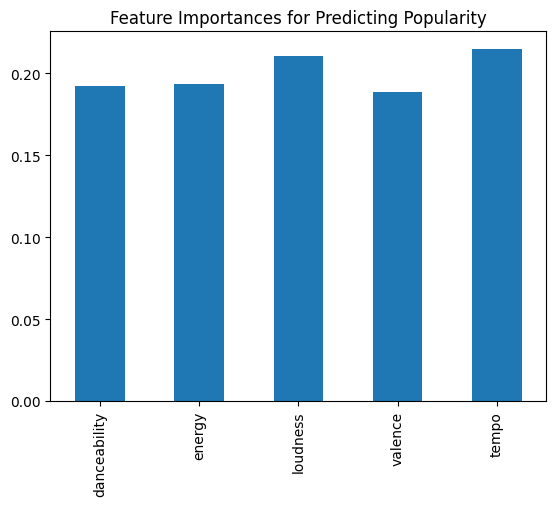

In [58]:
from sklearn.ensemble import RandomForestRegressor

features = df[['danceability', 'energy', 'loudness', 'valence', 'tempo']]
target = df['popularity']
model = RandomForestRegressor()
model.fit(features, target)
feature_importances = pd.Series(model.feature_importances_, index=features.columns)
feature_importances.plot(kind='bar')
plt.title('Feature Importances for Predicting Popularity')
plt.show()


In [61]:
numeric_df = df.select_dtypes(include=['int', 'float'])

In [62]:
corr_matrix = numeric_df.corr()

In [66]:
corr_matrix.loc[['danceability', 'energy', 'loudness', 'valence', 'tempo'], 'popularity']

danceability    0.033795
energy         -0.002976
loudness        0.047268
valence        -0.041328
tempo           0.012151
Name: popularity, dtype: float64

In [67]:
corr_matrix

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster,pca-one,pca-two
popularity,1.000000,-0.008219,0.033795,-0.002976,-0.004077,0.047268,-0.014434,-0.045825,-0.022415,-0.095300,-0.005678,-0.041328,0.012151,0.030580,0.019858,1.242209e-02,4.554950e-02
duration_ms,-0.008219,1.000000,-0.074215,0.058297,0.008729,-0.004060,-0.035946,-0.063182,-0.103815,0.125191,0.010226,-0.154780,0.024406,0.018273,-0.033374,2.434955e-02,-9.625359e-03
danceability,0.033795,-0.074215,1.000000,0.131452,0.036291,0.256461,-0.069524,0.108020,-0.169145,-0.184030,-0.131636,0.476743,-0.051744,0.207204,0.069799,-5.011195e-02,2.744900e-01
energy,-0.002976,0.058297,0.131452,1.000000,0.047848,0.760545,-0.079399,0.141871,-0.732797,-0.180133,0.184712,0.258086,0.247308,0.186647,-0.038362,2.516307e-01,7.238880e-01
key,-0.004077,0.008729,0.036291,0.047848,1.000000,0.038138,-0.136099,0.020615,-0.040993,-0.006842,-0.001398,0.034202,0.010671,0.015249,0.000593,1.089038e-02,3.670803e-02
loudness,0.047268,-0.004060,0.256461,0.760545,0.038138,1.000000,-0.042179,0.059971,-0.588066,-0.432198,0.076662,0.279165,0.212121,0.191772,-0.006019,2.179434e-01,9.759602e-01
mode,-0.014434,-0.035946,-0.069524,-0.079399,-0.136099,-0.042179,1.000000,-0.046652,0.096603,-0.050663,0.013946,0.021440,0.000340,-0.024277,0.007743,8.164776e-05,-4.332216e-02
speechiness,-0.045825,-0.063182,0.108020,0.141871,0.020615,0.059971,-0.046652,1.000000,-0.001252,-0.089300,0.205243,0.036278,0.017012,-0.000492,-0.020791,1.735736e-02,5.780115e-02
acousticness,-0.022415,-0.103815,-0.169145,-0.732797,-0.040993,-0.588066,0.096603,-0.001252,1.000000,0.102091,-0.020311,-0.106025,-0.207452,-0.175661,0.051576,-2.107723e-01,-5.559758e-01
instrumentalness,-0.095300,0.125191,-0.184030,-0.180133,-0.006842,-0.432198,-0.050663,-0.089300,0.102091,1.000000,-0.079832,-0.324363,-0.049858,-0.082031,-0.070431,-5.242773e-02,-4.310373e-01


Interactive Dashboards:

Create interactive dashboards using tools like Plotly Dash or Tableau to explore your dataset dynamically.